<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Apprentice Chef | Classification Modeling</h2>
<br>Pimkarn Mekpruksawong<br>
Hult International Business School
<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h2>Part I: Dataset Exploration</h2><br>
Import the neccessary packages and load the Apprentice Chef dataset

In [1]:
# importing libraries
import numpy             as np                    
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer to use AUC instead of Accuracy metric
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
chef = pd.read_excel(file)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>a) Inspect all columns in the dataset.</h4>

In [2]:
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) Identify data type of each original variable in the dataset.</h4>

<h2>Part II: Missing Value Analysis and Imputation</h2><br>
<h4>a) Print number of missing values in the dataset.</h4>

In [3]:
# use method chaining to print sum missing values of each variable
chef.isnull().sum(axis = 0)


REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

As shown in the output, only FAMILY_NAME variable has missing values.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>b) Flag missing values</h4>

In [4]:
# looping to detect features with missing values
for col in chef:

    # creating columns with 1s if missing and 0 if not
    if chef[col].isnull().astype(int).sum() > 0:
        chef['m_' + col] =chef[col].isnull().astype(int)

# summing the missing value flags to check the results of the loop above
chef[['m_FAMILY_NAME']].sum(axis = 0)


m_FAMILY_NAME    47
dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Impute the missing values for FAMILY_NAME with 'Unknown'.</h4><br>
This is simply because family name is unique and my goal is to prevent any error caused by missing values.

In [5]:
# instantiating an imputation value
fill = 'Unknown'


# imputing 'FAMILY_NAME'o
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

# making sure missing values have been taken care of
chef.isnull().any(axis = 0).any(axis = 0)

False

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part III: Working with continuous variables</h2>

<h4>a) Develop a histogram to analyze the distribution of all continuous variables.</h4>

<strong>Remark: the histograms was commented-out in order to save processing time.</strong>


In [6]:
# developing a histogram using DISPLOT
#sns.displot(data   = chef,
#            x      = 'REVENUE',
#            height = 5,
#            aspect = 2)





# displaying the histogram
#plt.show()

In [7]:
# log transforming REVENUE and saving it to the dataset
chef['log_REVENUE'] = np.log10(chef['REVENUE'])

# developing a histogram using DISPLOT for REVENUE after log transformation
#sns.displot(data   = chef,
#            x      = 'log_REVENUE',
#            height = 5,
#            aspect = 2)


# displaying the histogram
#plt.show()

<br>

As can be observed from the distribution above, revenue is skewed positive.
<br><br>

After applying log transformation, revenue variable tends to become more normally distributed compared with the original data.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [8]:
# developing a histogram using DISPLOT
# AVG_TIME_PER_SITE_VISIT
#sns.displot(data   = chef,
#            x      = 'AVG_TIME_PER_SITE_VISIT',
#            height = 5,
#            aspect = 2)




# displaying the histogram
#plt.show()

In [9]:
# log transforming and saving it to the dataset
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])

# developing a histogram using DISPLOT
#sns.displot(data   = chef,
#            x      = 'log_AVG_TIME_PER_SITE_VISIT',
#            height = 5,
#            aspect = 2)


# displaying the histogram
#plt.show()

<br>

As can be observed from the distribution above, AVG_TIME_PER_SITE_VISIT is skewed positive with outliers on the right side.

After applying log transformation, AVG_TIME_PER_SITE_VISIT variable tend to become more normally distributed compared with the original data.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [10]:
# developing a histogram using DISPLOT
# AVG_PREP_VID_TIME
#sns.displot(data   = chef,
#            x      = 'AVG_PREP_VID_TIME',
#            height = 5,
#            aspect = 2)




# displaying the histogram
#plt.show()

In [11]:
# log transforming and saving it to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])

# developing a histogram using DISPLOT
#sns.displot(data   = chef,
#            x      = 'log_AVG_PREP_VID_TIME',
#            height = 5,
#            aspect = 2)


# displaying the histogram
#plt.show()

<br>

As can be observed from the distribution above, AVG_PREP_VID_TIME is skewed positive.<br><br>

After applying log transformation, AVG_PREP_VID_TIME variable tend to become more normally distributed compared with the original data.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>b) Correlation analysis between continuous variables and CROSS_SELL_SUCCESS.</h4>


In [12]:
# developing a correlation matrix
cont_corr = chef.loc[ : , ['REVENUE',
                             'AVG_TIME_PER_SITE_VISIT',
                             'AVG_PREP_VID_TIME',
                             'log_REVENUE',
                             'log_AVG_TIME_PER_SITE_VISIT',
                             'log_AVG_PREP_VID_TIME',
                             'CROSS_SELL_SUCCESS']  ].corr(method = 'pearson')\
                                                     .round(decimals = 2)



# checking the correlations of the newly-created variables
cont_corr.loc['CROSS_SELL_SUCCESS', : ].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
log_AVG_PREP_VID_TIME          0.03
AVG_PREP_VID_TIME              0.03
log_AVG_TIME_PER_SITE_VISIT    0.02
log_REVENUE                    0.01
AVG_TIME_PER_SITE_VISIT        0.01
REVENUE                        0.00
Name: CROSS_SELL_SUCCESS, dtype: float64

As seen in the output, all continuous variables have weak correlation with CROSS_SELL_SUCCESS.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part IV: Working with Interval/Count and Binary Variables</h2>
<h4>a) Correlation analysis between the response variable (CROSS_SELL_SUCCESS) and the explanatory variables.</h4>

In [13]:
# developing a correlation matrix
interval_corr = chef.drop(['REVENUE',
'AVG_TIME_PER_SITE_VISIT',
'AVG_PREP_VID_TIME',
'log_REVENUE',
'log_AVG_TIME_PER_SITE_VISIT',
'log_AVG_PREP_VID_TIME',
'm_FAMILY_NAME'], axis = 1)\
                    .corr(method = 'pearson')\
                    .round(decimals = 2)


# checking the correlations
interval_corr.loc['CROSS_SELL_SUCCESS', : ]\
                    .sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_BEFORE_NOON      0.16
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
MASTER_CLASSES_ATTENDED        0.04
PACKAGE_LOCKER                 0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
PC_LOGINS                      0.04
MEDIAN_MEAL_RATING             0.03
LARGEST_ORDER_SIZE             0.02
EARLY_DELIVERIES               0.02
TOTAL_MEALS_ORDERED            0.01
TOTAL_PHOTOS_VIEWED            0.01
LATE_DELIVERIES                0.01
PRODUCT_CATEGORIES_VIEWED      0.00
UNIQUE_MEALS_PURCH             0.00
WEEKLY_PLAN                   -0.01
AVG_CLICKS_PER_VISIT          -0.04
CANCELLATIONS_AFTER_NOON      -0.05
MOBILE_LOGINS                 -0.05
Name: CROSS_SELL_SUCCESS, dtype: float64

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
As seen in the output, the following variables have a strong correlation with the success of cross-selling promotion which some of them will be use in feature engineering later.

Positive correlation:
* CANCELLATIONS_BEFORE_NOON	
* MOBILE_NUMBER
* TASTES_AND_PREFERENCES
* REFRIGERATED_LOCKER
* PACKAGE_LOCKER

Negative correlation:
* CANCELLATIONS_AFTER_NOON
* MOBILE_LOGINS

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h3>Feature Engineering</h3>
<h3>I. Cancellations variables</h3>
<h4>a) Engineer a feature that represents total number of cancellations using the following calculation:</h4>

    Total_Cancel = CANCELLATIONS_BEFORE_NOON + CANCELLATIONS_AFTER_NOON

In [14]:
# total number of cancellations
chef['Total_Cancel'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']

# printing value counts
print(f"""
--------------------------------
Total number of cancellations
--------------------------------
{chef['Total_Cancel'].value_counts(normalize = False).sort_index()}

""")


--------------------------------
Total number of cancellations
--------------------------------
0     572
1     583
2     336
3     224
4     121
5      58
6      28
7      12
8       9
9       1
10      1
13      1
Name: Total_Cancel, dtype: int64




<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>b) Engineer a feature that represents customers who had cancel the orders at least once and who never cancel the orders.</h4>

In [15]:
# printing value counts for Cancellation variables to make sure there are at least 100 observations on each side

print(f"""
Count of Cancellation
==================

----------
Before Noon
----------
{chef['CANCELLATIONS_BEFORE_NOON'].value_counts(normalize = False).sort_index()}


----------
After Noon
----------
{chef['CANCELLATIONS_AFTER_NOON'].value_counts(normalize = False).sort_index()}


""")


Count of Cancellation

----------
Before Noon
----------
0     667
1     567
2     331
3     189
4     105
5      43
6      23
7      11
8       7
9       1
10      1
13      1
Name: CANCELLATIONS_BEFORE_NOON, dtype: int64


----------
After Noon
----------
0    1667
1     238
2      38
3       3
Name: CANCELLATIONS_AFTER_NOON, dtype: int64





In [16]:
# create new feature

# create dummy variable 
chef['has_Cancel']   = 0


# iterating over each value 
for index, value in chef.iterrows():
    
    if chef.loc[index, 'Total_Cancel'] > 0:
        chef.loc[index, 'has_Cancel'] = 1
        
# checking results
chef[['has_Cancel']].head(5)


,has_Cancel
0,1
1,0
2,1
3,1
4,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>c) Check the correlations of these new features with CROSS_SELL_SUCCESS.</h4>


In [17]:
# developing a correlation matrix
cancel_corr = chef.loc[ : , ['CANCELLATIONS_BEFORE_NOON',
                             'CANCELLATIONS_AFTER_NOON',
                             'Total_Cancel',
                             'has_Cancel',
                             'CROSS_SELL_SUCCESS']  ].corr(method = 'pearson')\
                                                     .round(decimals = 2)



# checking the correlations of the newly-created variables
cancel_corr.loc['CROSS_SELL_SUCCESS', : ].sort_values(ascending = False)

CROSS_SELL_SUCCESS           1.00
CANCELLATIONS_BEFORE_NOON    0.16
Total_Cancel                 0.14
has_Cancel                   0.10
CANCELLATIONS_AFTER_NOON    -0.05
Name: CROSS_SELL_SUCCESS, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>II. PC_LOGINS and MOBILE_LOGINS variables</h3>
<h4>a) Engineer a feature that represents total logins using the following calculation:</h4>

    Total_Logins = PC_LOGINS + MOBILE_LOGINS

In [18]:
# total number of cancellations
chef['Total_Logins'] = chef['PC_LOGINS'] + chef['MOBILE_LOGINS']


# developing a correlation matrix
logins_corr = chef.loc[ : , ['PC_LOGINS',
                             'MOBILE_LOGINS',
                             'Total_Logins',
                             'CROSS_SELL_SUCCESS']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations
print(f"""
Total Logins
=================

-------------------------------
Total number of Total_Logins
-------------------------------
{chef['Total_Logins'].value_counts(normalize = False).sort_index()}


-------------------------------
Total_Logins Correlations
-------------------------------
{logins_corr['CROSS_SELL_SUCCESS']}

""")


Total Logins

-------------------------------
Total number of Total_Logins
-------------------------------
5     31
6    493
7    906
8    492
9     24
Name: Total_Logins, dtype: int64


-------------------------------
Total_Logins Correlations
-------------------------------
PC_LOGINS             0.04
MOBILE_LOGINS        -0.05
Total_Logins         -0.00
CROSS_SELL_SUCCESS    1.00
Name: CROSS_SELL_SUCCESS, dtype: float64




No correlation between Total_Logins and CROSS_SELL_SUCCESS.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>III. Count variables with Zeros value</h3>
<h4>a) Use subsetting to check the value counts for all variables that appear to have zero values.  </h4>

In [19]:
# counting the number 
MOBILE_LOGINS_zeros             = len(chef['MOBILE_LOGINS'][chef['MOBILE_LOGINS'] == 0])
WEEKLY_PLAN_zeros               = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == 0])
EARLY_DELIVERIES_zeros          = len(chef['EARLY_DELIVERIES'][chef['EARLY_DELIVERIES'] == 0])
LATE_DELIVERIES_zeros           = len(chef['LATE_DELIVERIES'][chef['LATE_DELIVERIES'] == 0])
MASTER_CLASSES_ATTENDED_zeros   = len(chef['MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] == 0])
TOTAL_PHOTOS_VIEWED_zeros       = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0])


# printing a table of the results
print(f"""
                            No\t\tYes
                       ---------------------
Moblie logins         | {MOBILE_LOGINS_zeros }\t\t{len(chef) - MOBILE_LOGINS_zeros }
Weekly plan           | {WEEKLY_PLAN_zeros }\t\t{len(chef) - WEEKLY_PLAN_zeros }
Early deliveries      | {EARLY_DELIVERIES_zeros}\t\t{len(chef) - EARLY_DELIVERIES_zeros }
Late deliveries       | {LATE_DELIVERIES_zeros }\t\t{len(chef) - LATE_DELIVERIES_zeros }
Master class attened  | {MASTER_CLASSES_ATTENDED_zeros }\t\t{len(chef) - MASTER_CLASSES_ATTENDED_zeros }
Total photos viewed   | {TOTAL_PHOTOS_VIEWED_zeros }\t\t{len(chef) - TOTAL_PHOTOS_VIEWED_zeros }

""")


                            No		Yes
                       ---------------------
Moblie logins         | 16		1930
Weekly plan           | 468		1478
Early deliveries      | 1167		779
Late deliveries       | 319		1627
Master class attened  | 932		1014
Total photos viewed   | 1140		806




<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>b) Engineer flag features for all variables that have at least 100 observations in both the 'yes' and 'no' columns.  </h4>

In [20]:
# create dummy variable 
chef['REG_WEEKLY_PLAN']        = 0
chef['YES_EARLY_DELIVERIES']   = 0
chef['YES_LATE_DELIVERIES']    = 0
chef['ATTEND_MASTER_CLASSES']  = 0
chef['YES_PHOTOS_VIEWED']      = 0

# iterating over each original column to change values in the new feature columns
for index, value in chef.iterrows():
    
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'REG_WEEKLY_PLAN'] = 1
        
    if chef.loc[index, 'EARLY_DELIVERIES'] > 0:
        chef.loc[index, 'YES_EARLY_DELIVERIES'] = 1
        
    if chef.loc[index, 'LATE_DELIVERIES'] > 0:
        chef.loc[index, 'YES_LATE_DELIVERIES'] = 1        

    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'ATTEND_MASTER_CLASSES'] = 1
        
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'YES_PHOTOS_VIEWED'] = 1
        

In [21]:
# developing a small correlation matrix
zeroes_corr = chef.corr().round(decimals = 3)


# checking the correlations of the newly-created variables with revenue
zeroes_corr.loc['CROSS_SELL_SUCCESS',                                   # Y-variable
               ['REG_WEEKLY_PLAN', 
                'YES_EARLY_DELIVERIES',
                'YES_LATE_DELIVERIES',
                'ATTEND_MASTER_CLASSES',
                'YES_PHOTOS_VIEWED']] \
                .sort_values(ascending = False)

ATTEND_MASTER_CLASSES    0.050
YES_PHOTOS_VIEWED        0.011
YES_LATE_DELIVERIES      0.002
YES_EARLY_DELIVERIES    -0.006
REG_WEEKLY_PLAN         -0.019
Name: CROSS_SELL_SUCCESS, dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part V: Working with Categorical variables</h2>
<h3>I. EMAIL variable</h3>
<h4>a) Splitting email domain from email addresses</h4>

In [22]:
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>b) Concatenate the email domains as a new column in the dataset.</h4>

In [23]:
# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating email_domain with chef dataset
chef = pd.concat([chef, email_df['email_domain']],
                     axis = 1)


# printing value counts of email_domain
chef.loc[: ,'email_domain'].value_counts()


gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
jnj.com              28
mcdonalds.com        28
merck.com            28
nike.com             27
apple.com            27
ge.org               26
dupont.com           26
ibm.com              26
microsoft.com        25
chevron.com          25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
pg.com               22
verizon.com          22
mmm.com              22
caterpillar.com      22
disney.com           21
walmart.com          21
pfizer.com           20
visa.com             20
jpmorgan.com         19
cisco.com            18
goldmansacs.com      18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: email_domain, dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>c) Aggregate the email domains into professional, personal, and junk groups.</h4>

In [24]:
# email domain types
professional_email_domains = ['@mmm.com',
                                '@amex.com',
                                '@apple.com',
                                '@boeing.com',
                                '@caterpillar.com',
                                '@chevron.com',
                                '@cisco.com',
                                '@cocacola.com',
                                '@disney.com',
                                '@dupont.com',
                                '@exxon.com',
                                '@ge.org',
                                '@goldmansacs.com',
                                '@homedepot.com',
                                '@ibm.com',
                                '@intel.com',
                                '@jnj.com',
                                '@jpmorgan.com',
                                '@mcdonalds.com',
                                '@merck.com',
                                '@microsoft.com',
                                '@nike.com',
                                '@pfizer.com',
                                '@pg.com',
                                '@travelers.com',
                                '@unitedtech.com',
                                '@unitedhealth.com',
                                '@verizon.com',
                                '@visa.com',
                                '@walmart.com']
personal_email_domains = ['@gmail.com',
                            '@yahoo.com',
                            '@protonmail.com']
junk_email_domains  = ['@me.com',
                        '@aol.com',
                        '@hotmail.com',
                        '@live.com',
                        '@msn.com',
                        '@passport.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domain']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>d) One hot encode domain_group variable using get_dummies.</h4>

In [25]:
# one hot encoding domain_group variables
one_hot_domain_group       = pd.get_dummies(chef['domain_group'])

# dropping categorical variables after they've been encoded
chef = chef.drop(['email_domain','domain_group'], axis = 1)


# joining codings together
chef = chef.join([one_hot_domain_group])


# saving new columns
new_columns = chef.columns

# check data
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'm_FAMILY_NAME', 'log_REVENUE', 'log_AVG_TIME_PER_SITE_VISIT', 'log_AVG_PREP_VID_TIME', 'Total_Cancel', 'has_Cancel', 'Total_Logins', 'REG_WEEKLY_PLAN', 'YES_EARLY_DELIVERIES', 'YES_LATE_DELIVERIES', 'ATTEND_MASTER_CLASSES', 'YES_PHOTOS_VIEWED', 'junk', 'personal', 'professional'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>II. NAME variable</h3>
<h4>a) Develop a number of names feature.</h4>

In [26]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [27]:
# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = chef)


# checking results
chef['number_of_names'].value_counts().sort_index()

1     591
2    1201
3      98
4       9
5      35
6      12
Name: number_of_names, dtype: int64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2> Part VI: Additional feature engineering</h2>

In [28]:
#######################################################################
# customer using mobile number (1) and select taste and preferences (1)
#######################################################################

# create dummy variable 
chef['mobile_taste']   = 0


# iterating over each value 
for index, value in chef.iterrows():
    
    if chef.loc[index, 'MOBILE_NUMBER'] > 0 and chef.loc[index, 'TASTES_AND_PREFERENCES'] > 0:
        chef.loc[index, 'mobile_taste'] = 1
        
# checking results
chef[['mobile_taste']].head(5)


,mobile_taste
0,1
1,1
2,1
3,1
4,0


In [29]:
##########################################################################################################
# customer using mobile number (1) and select taste and preferences (1) and register weekly meal plan (1)
##########################################################################################################
# worst than mobile_taste variable
# create dummy variable 
chef['mobile_taste_plan']   = 0


# iterating over each value 
for index, value in chef.iterrows():
    
    if chef.loc[index, 'MOBILE_NUMBER'] > 0 and chef.loc[index, 'TASTES_AND_PREFERENCES'] > 0 and chef.loc[index, 'REG_WEEKLY_PLAN'] > 0:
        chef.loc[index, 'mobile_taste_plan'] = 1
        
# checking results
chef[['mobile_taste_plan']].head(5)



,mobile_taste_plan
0,0
1,1
2,1
3,1
4,0


In [30]:
##########################################################################################################
# has a package locker (1) and has refrigerated compartments (1)
##########################################################################################################

# create dummy variable 
chef['locker_fridge']   = 0


# iterating over each value 
for index, value in chef.iterrows():
    
    if chef.loc[index, 'PACKAGE_LOCKER'] > 0 and chef.loc[index, 'REFRIGERATED_LOCKER'] > 0 :
        chef.loc[index, 'locker_fridge'] = 1
        
# checking results
chef[['locker_fridge']].head(5)



,locker_fridge
0,0
1,0
2,0
3,0
4,0


In [31]:
##########################################################################################################
# valid email (professional and personal) and junk
##########################################################################################################

# create dummy variable 
chef['valid_email']   = 0


# iterating over each value 
for index, value in chef.iterrows():
    
    if chef.loc[index, 'professional'] > 0 or chef.loc[index, 'personal'] > 0 :
        chef.loc[index, 'valid_email'] = 1
        
# checking results
chef[['valid_email']].head(5)



,valid_email
0,1
1,1
2,1
3,1
4,1


In [32]:
##########################################################################################################
# customer received early or late deliveries and did contact with customer service 
##########################################################################################################

# create dummy variable 
chef['EARLY_LATE_CUSTSERVICE']   = 0


# iterating over each value 
for index, value in chef.iterrows():
    
    if chef.loc[index, 'EARLY_DELIVERIES'] > 0 or chef.loc[index, 'LATE_DELIVERIES'] > 0 and chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 0 :
        chef.loc[index, 'EARLY_LATE_CUSTSERVICE'] = 1
        
# checking results
chef[['EARLY_LATE_CUSTSERVICE']].head(5)



,EARLY_LATE_CUSTSERVICE
0,1
1,1
2,1
3,1
4,1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Part VII. Classification Modeling</h2>
<h4>a) Create user-defined functions</h4>


In [33]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>b) Dropping irrelevant features</h4>

In [34]:
# checking columns
#chef.columns

In [35]:
# dropping categorical variables after they've been encoded and irrelevant
chef = chef.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)

# checking the results
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'm_FAMILY_NAME', 'log_REVENUE', 'log_AVG_TIME_PER_SITE_VISIT', 'log_AVG_PREP_VID_TIME', 'Total_Cancel', 'has_Cancel', 'Total_Logins', 'REG_WEEKLY_PLAN', 'YES_EARLY_DELIVERIES', 'YES_LATE_DELIVERIES', 'ATTEND_MASTER_CLASSES', 'YES_PHOTOS_VIEWED', 'junk', 'personal', 'professional', 'number_of_names', 'mobile_taste', 'mobile_taste_plan', 'locker_fridge', 'valid_email', 'EARLY_LATE_CUSTSERVICE'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>c) Applying value_counts for Response Variable to understand the proportion of success versus not success campaign.</h4>


In [36]:
print(f"""
Proportion of CROSS_SELL_SUCCESS
============================
{chef['CROSS_SELL_SUCCESS'].value_counts(normalize = False).sort_index()}

""")


Proportion of CROSS_SELL_SUCCESS
0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64




The proportion of the success of a cross-selling promotion is far more ones (success) than zeros.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>d) Correlation analysis between the explanatory variables and the response variable. </h4>

In [37]:
df_corr = chef.corr(method = 'pearson').round(decimals = 2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
valid_email                    0.28
professional                   0.19
number_of_names                0.16
CANCELLATIONS_BEFORE_NOON      0.16
Total_Cancel                   0.14
mobile_taste                   0.12
MOBILE_NUMBER                  0.10
has_Cancel                     0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
locker_fridge                  0.07
mobile_taste_plan              0.07
ATTEND_MASTER_CLASSES          0.05
CONTACTS_W_CUSTOMER_SERVICE    0.04
PACKAGE_LOCKER                 0.04
PC_LOGINS                      0.04
personal                       0.04
MASTER_CLASSES_ATTENDED        0.04
AVG_PREP_VID_TIME              0.03
MEDIAN_MEAL_RATING             0.03
log_AVG_PREP_VID_TIME          0.03
m_FAMILY_NAME                  0.02
LARGEST_ORDER_SIZE             0.02
log_AVG_TIME_PER_SITE_VISIT    0.02
EARLY_DELIVERIES               0.02
TOTAL_PHOTOS_VIEWED            0.01
log_REVENUE                 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>e) Creating a dictionary to store candidate models</h4>

In [38]:
# create explanatory variable sets
candidate_dict = {

 # original x-variables
 'original'   : ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
           'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
           'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
           'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 
           'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
           'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 
           'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
           'TOTAL_PHOTOS_VIEWED'],
    
 # significant variables only (set 1) AUC 0.5336
 'logit_sig1'    : ['CANCELLATIONS_BEFORE_NOON','MOBILE_NUMBER',
                    'TASTES_AND_PREFERENCES' , 'REFRIGERATED_LOCKER' ,
                    'PC_LOGINS' , 'MEDIAN_MEAL_RATING'],
    
 # significant variables only (set 2) AUC 0.6286
 'logit_sig2'    : ['CANCELLATIONS_BEFORE_NOON','MOBILE_NUMBER',
                    'personal', 'professional'],
     
 # significant variables only (set 3) AUC 0.6331
 'logit_sig3'    : ['CANCELLATIONS_BEFORE_NOON','MOBILE_NUMBER',
                    'personal', 'professional','TASTES_AND_PREFERENCES'],
    
 # significant variables only (set 4) AUC 0.6379
 'logit_sig4'    : ['CANCELLATIONS_BEFORE_NOON','MOBILE_NUMBER',
                    'personal', 'professional','TASTES_AND_PREFERENCES','number_of_names'], 
    
 # significant variables only (set 5) AUC 0.6446
 'logit_sig5'    : ['CANCELLATIONS_BEFORE_NOON','mobile_taste',
                    'personal', 'professional','number_of_names'], 
    
 # significant variables only (set 6) AUC 0.6459
 'logit_sig6'    : ['CANCELLATIONS_BEFORE_NOON','mobile_taste',
                    'personal', 'professional','number_of_names',
                    'locker_fridge' ]
    
    
}

# defining explanatory variable set to run in the models
key_to_run = 'logit_sig6'



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>f) Preparing Explanatory and Response Data.</h4>

In [39]:
# declaring explanatory variables
chef_data   = chef.loc[ : , candidate_dict[key_to_run] ]

# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>g) Prepare train-test split for statsmodels.</h4><br>
Declare the explanatory variables as <strong>chef_data</strong> and the response variable (CROSS_SELL_SUCCESS) as <strong>chef_target</strong>.

In [40]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>I. Logistic Regressionn</h3>

<h4>a) Print explanatory variables to copy to the models</h4>

In [41]:
for val in chef_data:
    print(f" {val} + ")

 CANCELLATIONS_BEFORE_NOON + 
 mobile_taste + 
 personal + 
 professional + 
 number_of_names + 
 locker_fridge + 


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>b) Build a logistic regression model in statsmodels using candidate models in dictionary.</h4><br>

* original x-variables
* logit_sig (all features are significant based on their p-values)


In [42]:
 # instantiating a logistic regression model object
logistic_sig6 = smf.logit(formula = """CROSS_SELL_SUCCESS ~
                                         CANCELLATIONS_BEFORE_NOON + 
                                         mobile_taste + 
                                         personal + 
                                         professional + 
                                         number_of_names + 
                                         locker_fridge 

                                          """, 
                           data    = chef_train)


# fitting the model object
results_sig6 = logistic_sig6.fit()


# checking the results SUMMARY
results_sig6.summary()




Optimization terminated successfully.
         Current function value: 0.549879
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1452
Method:                           MLE   Df Model:                            6
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                  0.1243
Time:                        21:59:40   Log-Likelihood:                -802.27
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.213e-46
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.1788      0.246     -8.866      0.000      -2.660      -1.697
CANCELLATIONS_BEFORE_NOON     0.2743      0.046      5.936      0.000       0.184       0.365
mobile_taste                  0.5821      0.125      4.656      0.000       0.337       0.827
personal                      1.2785      0.156      8.217      0.000       0.973       1.583
professional                  1.8580      0.169     10.982      0.000       1.526       2.190
number_of_names               0.5508      0.093      5.896      0.000       0.368       0.734
locker_fridge                 0.5241      0.206      2.544      0.011       0.120       0.928
=============================================================================================
"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>c) Logistic Regression with Hyperparameter Tuning.</h4>


In [43]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = np.arange(0.1, 5.0, 0.1)   # similar to alpha in lasso regression but inverse => lower C will try to help us select sig variables
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1200)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 500,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

C:\Users\Pimkarn\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 294 is smaller than n_iter=500. Running 294 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 1.1}
Tuned CV AUC      : 0.6459


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>d) Checking the best estimator for the model.</h4>


In [44]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=1.1, max_iter=1200, random_state=219, solver='newton-cg',
                   warm_start=True)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>e) Predict and score a logistic regression model using lr_tuned_cv.best_estimator_.</h4>


In [45]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc


LR Tuned Training ACCURACY: 0.7402
LR Tuned Testing  ACCURACY: 0.7536
LR Tuned AUC Score        : 0.6594


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>f) Unpack the confusion matrix.</h4>



In [46]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 62
False Positives: 94
False Negatives: 26
True Positives : 305



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>g) Store the model results.</h4>

In [47]:
# declaring model performance objects
lr_train_acc = lr_tuned_train_score
lr_test_acc  = lr_tuned_test_score
lr_auc       = lr_tuned_auc

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>II. Classification Trees (CART Models)</h3>
<h4>a) User-defined function for CART model output</h4>

In [48]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances for CART model
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Test feature importances</h3><br>
The purpose is to check the explanatory variables that have the strongest impact on the success of cross-selling promotion in order to create new variable sets and select x-variables in logistic regression model.

<strong>Remark: this session was commented-out in order to save processing time.</strong>

<h4>a) Create dictionary of explanatory variable sets for CART models. </h4>


In [49]:
# create explanatory variable sets
#candidate_dict_CART = {

 # original x-variables
 #'original_CART'   : [
 #          'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
 #          'log_AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
 #          'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 
 #          'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 
 #          'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'log_AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 
 #          'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 
 #          'TOTAL_PHOTOS_VIEWED']
    
 # significant variables only (set 1) AUC 0.5336
 #'logit_sig1'    : ['CANCELLATIONS_BEFORE_NOON','MOBILE_NUMBER',
 #                   'TASTES_AND_PREFERENCES' , 'REFRIGERATED_LOCKER' ,
 #                   'PC_LOGINS' , 'MEDIAN_MEAL_RATING'],

#} # closing candidate_dict_CART

# defining explanatory variable set to run in the models
#key_to_run_CART = 'original_CART'


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>b) Prepare Explanatory Data for testing feature importance.</h4>

In [50]:
# declaring explanatory variables
# chef_data_CART   = chef.loc[ : , candidate_dict_CART[key_to_run_CART] ]


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>c) Prepare train-test split.</h4>

In [51]:
# train-test split with stratification
#x_train_CART, x_test_CART, y_train_CART, y_test_CART = train_test_split(
#            chef_data_CART,
#            chef_target,
#            test_size    = 0.25,
#            random_state = 219,
#            stratify     = chef_target)


# merging training data for statsmodels
#chef_train_CART = pd.concat([x_train_CART, y_train_CART], axis = 1)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>d) Hyperparameter Tuning on Classification Trees.</h4>


In [52]:
# declaring a hyperparameter space
#criterion_space = ['gini', 'entropy']
#splitter_space  = ['best', 'random']
#depth_space     = pd.np.arange(1, 8, 1)
#leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_space,
#              'splitter'         : splitter_space,
#              'max_depth'        : depth_space,
#              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
#tuned_tree_CART = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_CART_cv = RandomizedSearchCV(estimator             = tuned_tree_CART,
#                                   param_distributions   = param_grid,
#                                   cv                    = 3,   
#                                   n_iter                = 1000,
#                                   random_state          = 219,
#                                   scoring = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_CART_cv.fit(chef_data_CART, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_CART_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_CART_cv.best_score_.round(4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>e) Build a classification tree model based on the hyperparameter tuning results.</h4>

In [53]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
#tree_tuned_CART = tuned_tree_CART_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
#tree_tuned_CART_pred = tree_tuned_CART.predict(x_test_CART)


# SCORING the results
#print('Training ACCURACY:', tree_tuned_CART.score(x_train_CART, y_train_CART).round(4))
#print('Testing  ACCURACY:', tree_tuned_CART.score(x_test_CART, y_test_CART).round(4))
#print('AUC Score        :', roc_auc_score(y_true  = y_test_CART,
#                                          y_score = tree_tuned_CART_pred).round(4))


# saving scoring data for future use
#tree_tuned_CART_train_score = tree_tuned_CART.score(x_train_CART, y_train_CART).round(4) # accuracy
#tree_tuned_CART_test_score  = tree_tuned_CART.score(x_test_CART, y_test_CART).round(4)   # accuracy


# saving the AUC score
#tree_tuned_CART_auc         = roc_auc_score(y_true  = y_test_CART,
#                                     y_score = tree_tuned_CART_pred).round(4) # auc

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>f) Unpack the confusion matrix.</h4>


In [54]:
# unpacking the confusion matrix
#tuned_tree_CART_tn, \
#tuned_tree_CART_fp, \
#tuned_tree_CART_fn, \
#tuned_tree_CART_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_CART_pred).ravel()


# printing each result one-by-one
#print(f"""
#True Negatives : {tuned_tree_CART_tn}
#False Positives: {tuned_tree_CART_fp}
#False Negatives: {tuned_tree_CART_fn}
#True Positives : {tuned_tree_CART_tp}
#""")

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>g) Display the tree graphically.</h4>


In [55]:
# displaying the tree
#display_tree(tree = tree_tuned_CART,
#             feature_df = chef_data_CART,
#             height = 1500,
#             width  = 1500)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Develop a classification tree model. </h3>
<h4>a) Create a classification tree model using candidate models in dictionary. </h4>

In [56]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier(max_depth = 8,
                                   random_state = 219)


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.7766
Full Tree Testing ACCURACY : 0.7659
Full Tree AUC Score: 0.6838


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>b) Unpack the confusion matrix.</h4>


In [57]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred ).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 71
False Positives: 85
False Negatives: 29
True Positives : 302



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>c) Call plot_feature_importances() function to see which variables the model found most important. </h4>

<ipython-input-48-4105c5057480>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


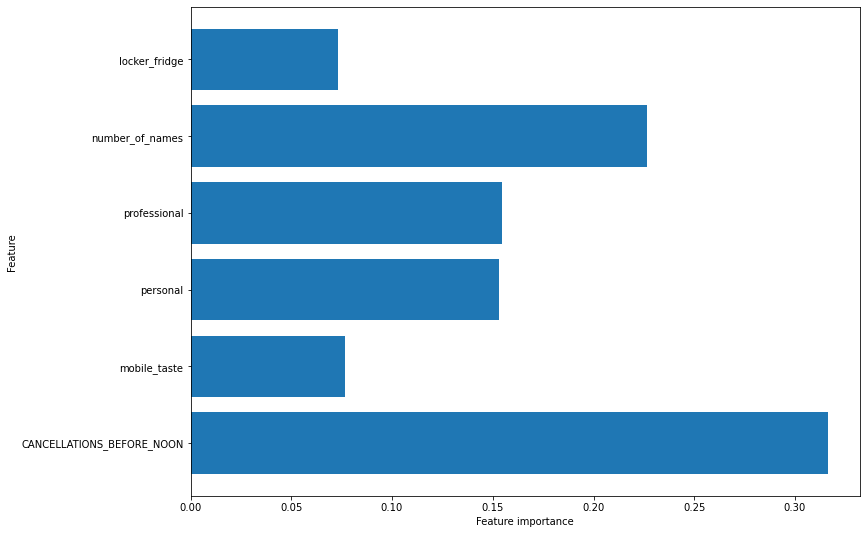

In [58]:
# plotting feature importance
plot_feature_importances(full_tree_fit,
                         train  = x_train,
                         export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>d) Prune the tree by developing a new classification tree model.</h4>

In [59]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 50,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7485
Testing  ACCURACY: 0.7659
AUC Score        : 0.7024


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>e) Unpack the confusion matrix.</h4>


In [60]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 82
False Positives: 74
False Negatives: 40
True Positives : 291



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>f) Call the display_tree( ) function and generate a visual tree output.</h4>

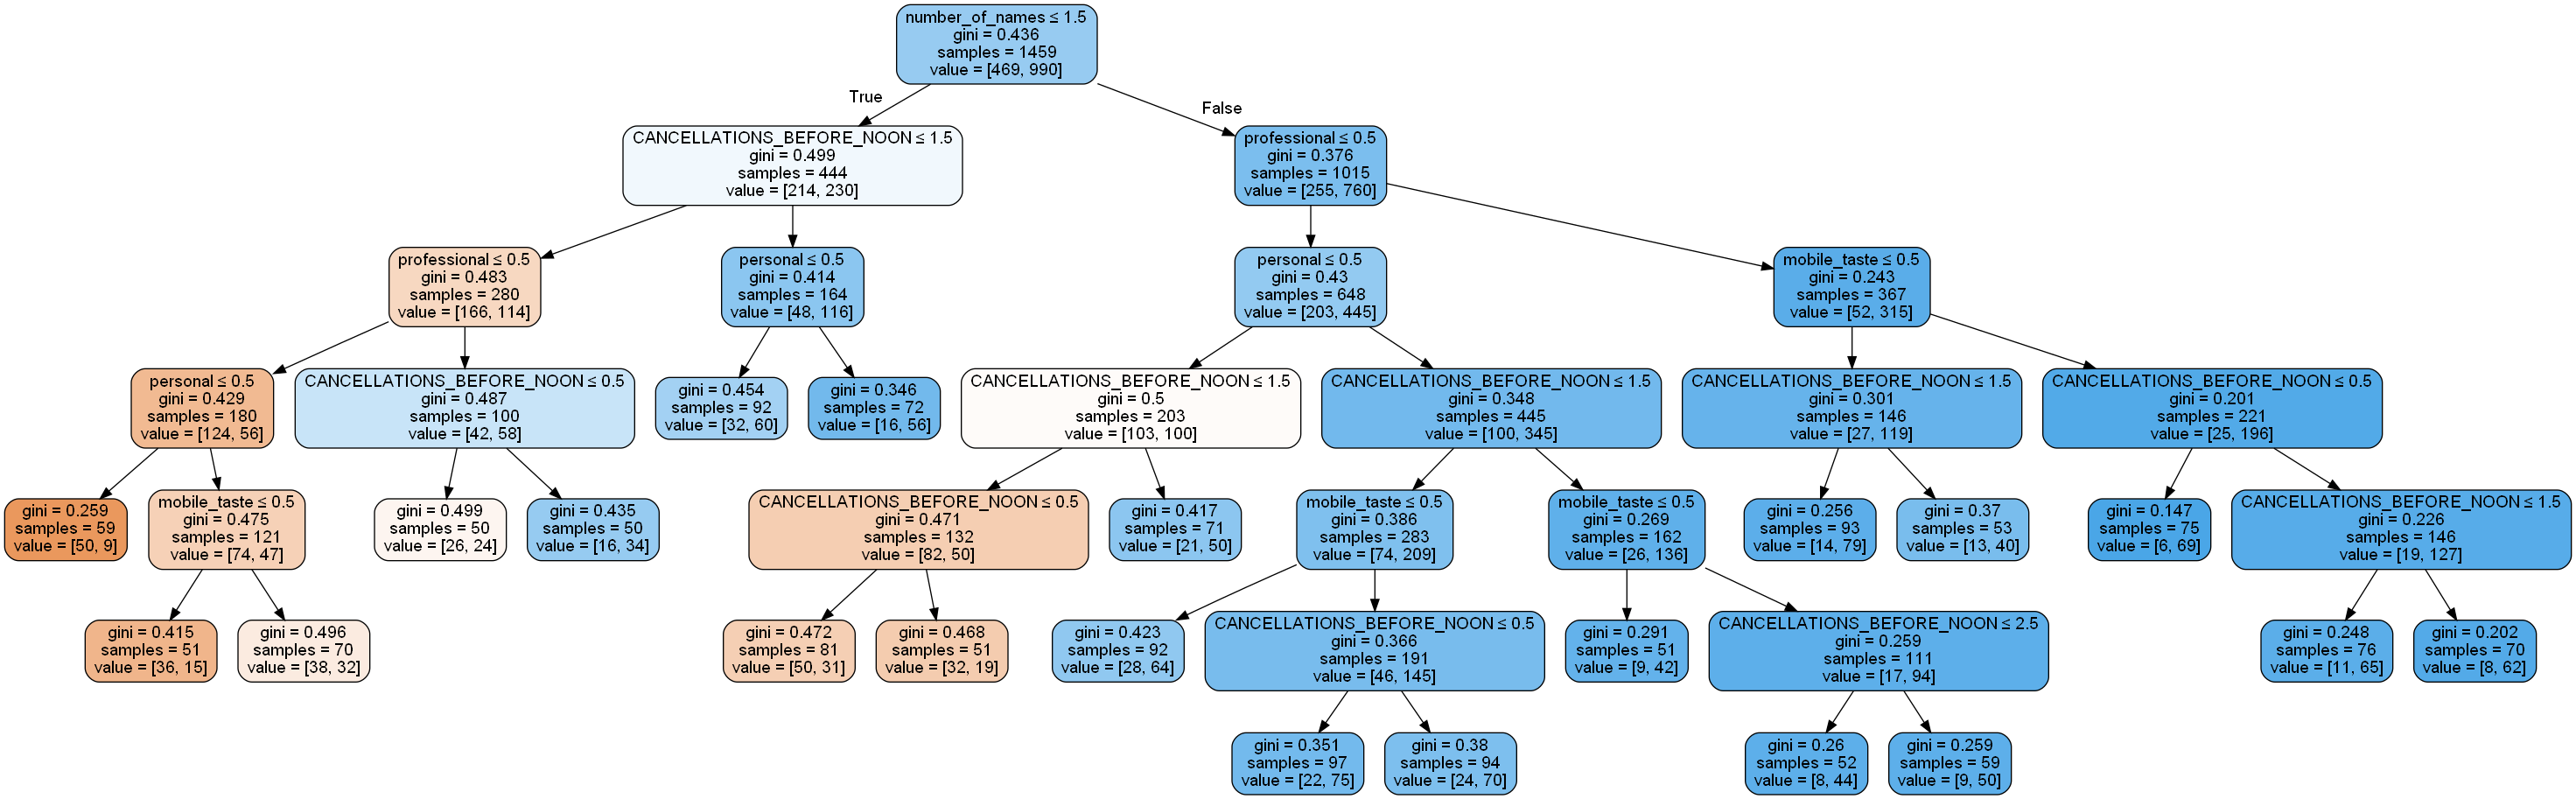

In [61]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = x_train)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>g) Call plot_feature_importances() function to see which variables the model found most important. </h4>

<ipython-input-48-4105c5057480>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


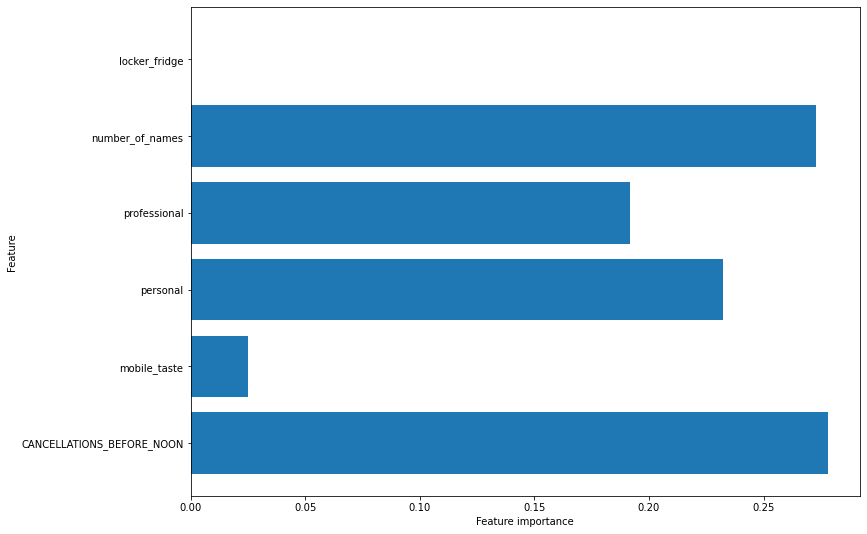

In [62]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = x_train,
                         export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>h) Hyperparameter Tuning on Classification Trees.</h4>


In [63]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,    
                                   n_iter                = 1500,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-63-2f27598c606e>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-63-2f27598c606e>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 6, 'max_depth': 7, 'criterion': 'entropy'}
Tuned Training AUC: 0.6851


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>i) Check the best estimator for the model</h4>


In [64]:
tuned_tree_cv.best_params_

{'splitter': 'best',
 'min_samples_leaf': 6,
 'max_depth': 7,
 'criterion': 'entropy'}

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>j) Build a classification tree model based on the hyperparameter tuning results.</h4>

In [65]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a classification tree object with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7587
Testing  ACCURACY: 0.7906
AUC Score        : 0.7375


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>k) Unpack the confusion matrix.</h4>



In [66]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 92
False Positives: 64
False Negatives: 38
True Positives : 293



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>l) Store the results of the tuned classification model to call in model_performance.</h4>


In [67]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>III. KNN</h2><br>
Requirement: the features take on continuous values, such as the price of a house, as opposed to categories, such as 'male' or 'female'. (source: DataCamp)
<h4>a) Call the optimal_neighbors function.</h4>


In [68]:
# determining the optimal number of neighbors
#opt_neighbors = optimal_neighbors(chef_data,
#                                  chef_target,
#                                  response_type = 'class')

The optimal number of neighbors is: 19<br>

<strong>Remark: this session was commented-out in order to save processing time.</strong>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>b) Scale the explanatory data and create a KNN classification model with optimal neighbors.</h4>

In [69]:
# copy/paste opt_neighbors to save processing time

# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            chef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = 19)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7594
Testing  ACCURACY: 0.77
AUC Score        : 0.6766


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h4>c) Unpack the confusion matrix.</h4>


In [70]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 65
False Positives: 91
False Negatives: 21
True Positives : 310



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>IV. Random Forest</h2>   
<h4>a) Hyperparameter Tuning on Random Forest using RandomizedSearchCV.</h4>

<strong>Remark: this session was commented-out in order to save processing time.</strong>


In [71]:
# declaring a hyperparameter space
#estimator_space  = pd.np.arange(100, 1100, 250)
#leaf_space       = pd.np.arange(1, 31, 10)
#criterion_space  = ['gini', 'entropy']
#bootstrap_space  = [True, False]
#warm_start_space = [True, False]


# creating a hyperparameter grid
#param_grid = {'n_estimators'     : estimator_space,
#              'min_samples_leaf' : leaf_space,
#              'criterion'        : criterion_space,
#              'bootstrap'        : bootstrap_space,
#              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#forest_grid = RandomForestClassifier(max_depth    = 8,
#                                     random_state = 219)


# GridSearchCV object
#forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                               param_distributions = param_grid,
#                               cv         = 3,
#                               n_iter     = 1000,
#                               scoring    = make_scorer(roc_auc_score,
#                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#forest_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", forest_cv.best_params_)
#print("Tuned Training AUC:", forest_cv.best_score_.round(4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>b) Check the best estimator for the model</h4>


In [72]:
# best estimators based on RandomizedSearchCV
#forest_cv.best_estimator_

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>c) Create a tuned random forest model based on hyperparameter tuning results.</h4>

In [73]:
# copy/pasting in the best_estimator_ results
# to avoid running another RandomizedSearch
forest_tuned = RandomForestClassifier(bootstrap      =False , 
                                      ccp_alpha      =0.0 , 
                                      class_weight   =None ,
                                      criterion      ='entropy',
                                      max_depth      =8 , 
                                      max_features   ='auto',
                                      max_leaf_nodes =None , 
                                      max_samples    =None ,
                                      min_impurity_decrease  =0.0 , 
                                      min_impurity_split     =None ,
                                      min_samples_leaf=11 , 
                                      min_samples_split=2 ,
                                      min_weight_fraction_leaf=0.0, 
                                      n_estimators=350,
                                      n_jobs=None, 
                                      oob_score=False, 
                                      random_state=219,
                                      verbose=0, 
                                      warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7663
Forest Tuned Testing  ACCURACY: 0.7721
Forest Tuned AUC Score        : 0.6832


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>d) Run the feature importance function</h4>

<ipython-input-48-4105c5057480>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


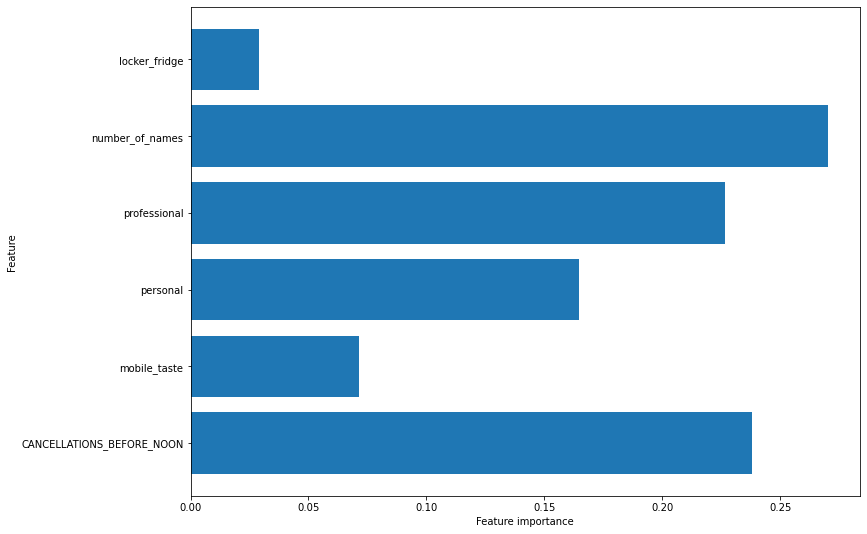

In [74]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>e) Unpack the confusion matrix</h4>

In [75]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 68
False Positives: 88
False Negatives: 23
True Positives : 308



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>f) Store the results of the tuned random forest model to call in model_performance.</h4>

In [76]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>V. Gradient Boosted Machines (GBM) </h2>
    
<h4>a) Build a gradient boosting classifier model with the hyperparameters tuning.</h4>

<strong>Remark: this session was commented-out in order to save processing time.</strong>

In [77]:
# declaring a hyperparameter space
#learn_space        = pd.np.arange(0.1, 4.0, 0.2)
#estimator_space    = pd.np.arange(100, 200, 5)
#depth_space        = pd.np.arange(1, 8, 1)
#warm_start_space   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_space,
#              'max_depth'     : depth_space,
#              'n_estimators'  : estimator_space,
#              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                           param_distributions = param_grid,
#                           cv                  = 3,
#                           n_iter              = 900,
#                           random_state        = 219,
#                           scoring             = make_scorer(roc_auc_score,
#                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>b) Check the best estimator for the model</h4>


In [78]:
# checking the best estimator for the model
#full_gbm_cv.best_estimator_

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>c) Manually input the optimal set of hyperparameters when instantiating the model object.</h4>

In [79]:
# INSTANTIATING the model object without hyperparameters

# copy/pasting in the best_estimator_ results
# hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(ccp_alpha=0.0, 
                                       criterion='friedman_mse', 
                                       init=None,
                                       learning_rate=0.5000000000000001, 
                                       loss='deviance',
                                       max_depth=1, 
                                       max_features=None, 
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, 
                                       min_impurity_split=None,
                                       min_samples_leaf=1, 
                                       min_samples_split=2,
                                       min_weight_fraction_leaf=0.0, 
                                       n_estimators=180,
                                       n_iter_no_change=None, 
                                       presort='deprecated',
                                       random_state=219, 
                                       subsample=1.0, tol=0.0001,
                                       validation_fraction=0.1, 
                                       verbose=0,
                                       warm_start=True)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7642
Testing  ACCURACY: 0.768
AUC Score        : 0.687


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>d) Unpack the confusion matrix</h4>

In [80]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 72
False Positives: 84
False Negatives: 29
True Positives : 302



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>e) Store the results of the tuned GBM model to call in model_performance.</h4>

In [81]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part VI : Comparing Results</h2>

In [82]:
# creating a dictionary for model results
model_performance = {
    
    'Model Name'        : ['Logistic', 'Full Tree', 'Pruned Tree', 'Tuned Tree', 'KNN', 'Tuned Random Forest', 'Tuned GBM' ],
           
    'Training Accuracy' : [lr_train_acc, full_tree_train_score,
                           pruned_tree_train_score, tree_train_acc,
                           knn_train_score, tuned_rf_train_acc,
                           gbm_train_acc],
           
    'Testing Accuracy'  : [lr_test_acc, full_tree_test_score,
                           pruned_tree_test_score, tree_test_acc,
                           knn_test_score, tuned_rf_test_acc,
                           gbm_test_acc],
    
    'AUC Score'         : [lr_auc, full_tree_auc_score, pruned_tree_auc_score, tree_auc,
                          knn_auc_score, tuned_rf_auc, gbm_auc],

    'Confusion Matrix'  : [(lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp),                         
                           (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp),
                           (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp)]}

# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)

# checking the results
model_performance.sort_values(by = 'AUC Score', ascending = False)

,Model Name,Training Accuracy,Testing Accuracy,AUC Score,Confusion Matrix
3,Tuned Tree,0.7587,0.7906,0.7375,"(92, 64, 38, 293)"
2,Pruned Tree,0.7485,0.7659,0.7024,"(82, 74, 40, 291)"
6,Tuned GBM,0.7642,0.7680,0.6870,"(72, 84, 29, 302)"
1,Full Tree,0.7766,0.7659,0.6838,"(71, 85, 29, 302)"
5,Tuned Random Forest,0.7663,0.7721,0.6832,"(68, 88, 23, 308)"
4,KNN,0.7594,0.7700,0.6766,"(65, 91, 21, 310)"
0,Logistic,0.7402,0.7536,0.6594,"(62, 94, 26, 305)"


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part VII: Final Model</h2>

In [83]:
model_performance.iloc[ 3 , :  ]

Model Name                  Tuned Tree
Training Accuracy               0.7587
Testing Accuracy                0.7906
AUC Score                       0.7375
Confusion Matrix     (92, 64, 38, 293)
Name: 3, dtype: object

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>